<a href="https://colab.research.google.com/github/juanjduran/ProcesamientoDeHabla/blob/main/Duran_Juan_Jose_TP_2_PH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 PROCESAMIENTO DEL HABLA

**Duran Juan Jose**


* Resolver las consignas comentando el código fuente, indicando desde dónde fue extraido o generado.

* Explicar y justificar cada paso realizado.

* Publique enlace público a su notebook en google colab y también enlace a su repositorio github de la materia.


### Entrega de los ejercicios

1. Crea un repositorio GitHub público dedicado a esta materia.
2. Sube tus notebooks de resolución para cada desafío allí.
3. Por cada desafío utilizaremos un sólo notebook.
4. Debes entregar tu TP1 en el foro correspondiente, siguiendo las instrucciones que allí indica.




## EJERCICIO CONSIGNA

* Cree una nube de palabras de un texto en español.

* Dicho texto puede ser descargado de Internet (webscrapping) o extraído del dataset de alguna librería.

* Puede usar cualquier libreria o herramienta para obtener el texto de su interés.

* En este notebook explica el paso a paso del proceso.



## 1- Webscrapping

Extrae un texto de Internet de una sóla página web usando alguna de las técnicas de webscrapping vistas en clase. Busca el discurso de alguna persona quien te inspire o haya dado una charla motivadora.

No puedes repetir ni usar ni el mismo texto ni la misma web que otra persona quien ya entregó en el foro.

Abajo añade los bloques de código y texto necesarios. Explica paso a paso como descargaste el texto de tu interés.


In [178]:
#Importacion de librerias necesarias
import requests
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer


#Definicion de variable URL que va a contener la url de la cual se va a extraer el texto
url = 'https://observandoelparaiso.wordpress.com/2013/05/31/monologo-de-cyrano-de-bergerac-no-gracias/'

#Creacion de variable response para hacer el requerimiento a la web y guardar la url
response = requests.get(url)
#Verificacion del estatus de la url
response.status_code

#Creacion de la sopa de palabras estraidas del htlm
soup = BeautifulSoup(response.text, 'html.parser')
#Obtencion del texto de la sopa de palabras
complete_text = soup.get_text()
#Establecer el texto todo en minusculas
min_text = complete_text.lower()
#Establecer un patros desde done va a comenzar el texto y donde termina
text_pattern = r"qué quieres que haga.*pero solo."
#Buscar coincidencias en el texto a partir del patron establecido
coincidences = re.findall(text_pattern, min_text, re.DOTALL)

#Se imprime el texto completo
print('\nTexto completo: \n')
print(coincidences)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Texto completo: 

['qué quieres que haga? ¿buscar un protector, un amo tal vez?\n ¿y cómo hiedra oscura que sobre la pared medrando sibilina y con adulación\xa0cambiar de camisa para obtener posición?\nno, gracias.\n¿dedicar si viene al caso versos a los banqueros,\n convertirme en payaso, adular con vileza los cuernos de un cabestro\n por temor a que me lance un gesto siniestro?\nno, gracias.\n¿desayunar cada día un sapo? ¿tener el vientre panzón?\n ¿un papo que me llegue las rodillas con dolencias\n pestilentes de tanto hacer reverencias?\nno, gracias.\n¿adular el talento de los canelos, vivir atemorizado por infames libelos, y repetir sin tregua:\nseñores, soy un loro, quiero ver mi nombre en letras de oro?\nno, gracias.\n¿sentir temor a los anatemas? ¿preferir las calumnias a los poemas, coleccionar medallas, urdir falacias?\nno, gracias; no, gracias; no gracias…\npero cantar… soñar…. reír, vivir, estar solo\n ser libre\n tener el ojo avizor\n la voz que vibre\n ponerme por sombre

## 2- Preprocesamiento

### 2.1 Muestra las stop words que tenga tu texto.

In [179]:
#Establecer stopwords en español para el texto
stpwrds = set(stopwords.words('spanish'))
#Una vez procesada la nube de palabral, aparecen algunas que podrian ser stopwords,
#se actualizan colocandolas manualmente con el fin de limpiar el texto
stpwrds.update('tal', 'cómo', 'vez')
#Mostrar las stopwords que condiente el texto
print('Stopwords: \n')
for p in str(coincidences).split():
    if p in stpwrds:
        print(p, end=', ')

Stopwords: 

que, un, un, que, sobre, la, y, con, de, para, al, a, los, en, con, los, de, un, por, a, que, me, un, un, el, que, me, las, con, de, tanto, el, de, los, por, y, sin, soy, un, mi, en, de, a, los, las, a, los, no, estar, el, la, que, por, el, por, un, sí, o, un, no, o, un, con, la, y, la, con, la, a, la, al, que, los, no, por, para, a, y, no, muy, pero, 

### 2.2 Quita las stop-words, caracteres extraños del texto. Utiliza el texto restante para crear una nube de palabras. Usa la biblioteca worldcloud de python.

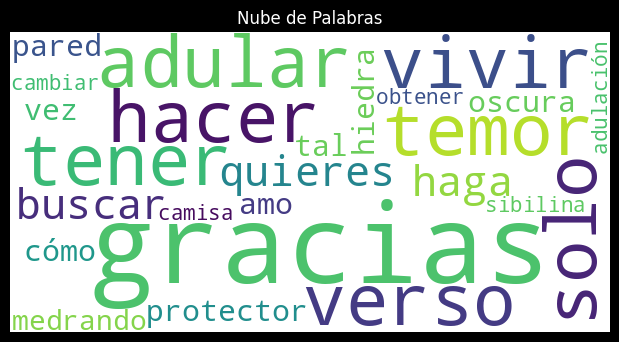

In [180]:
#Eliminacion de puntuacion del texto
wo_points = ''.join(c for c in coincidences if c not in string.punctuation)
#Eliminacion de saltos de linea, espacios, etc
wo_ch_pnts = re.sub(r'[^\w\s,]', '', wo_points)

#Creacion de la nube de palabras, se determina fondo blanco, un maxido de 25 palabras, las stopwords generadas y se utiliza el texto limpio
wordcloud = WordCloud(width=600, height=300, background_color="white", max_words=25, stopwords=stpwrds).generate(wo_ch_pnts)

#Creacion de la figura en matplotlib
plt.figure(figsize=(6, 6), facecolor='black')
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Nube de Palabras", color='white')
plt.tight_layout(pad=0)
plt.show()

### 2.3 Usando el texto que conseguiste en el punto 1).



#### 2.3.1 Limpia y preprocesa el texto, descomponelo en oraciones, arma una matriz documento-vocabulario.


In [181]:
"""Limpieza del texto"""
#Eliminacion de puntuacion del texto
wo_points = ''.join(c for c in coincidences if c not in string.punctuation)
#Eliminacion de saltos de linea, espacios, etc
wo_ch_pnts = re.sub(r'[^\w\s,]¿?', '', wo_points)

#Creacion de la lista de oraciones que componen el text
sentence_list = wo_ch_pnts.split('\n')
#Muestra de las oraciones que componen el texto
print('Oraciones que componen el texto: \n')
for i, sentence in enumerate(sentence_list, 1):
    print(f'{i}. {sentence}')

"""Matriz documento-vocabulario"""
#Creacion del vector que va a contener las oraciones del texto
corpus = np.array(sentence_list)
#Separacion en oraciones del contenido del texto, cada oracion sera una lista de palabras dentro del vector
documents = np.char.split(corpus)
print('\nVector de oraciones: \n')
print(documents)

"""Tokenizacion"""
#Creacion de la lista donde se guardaran los tokens
tokens = []
#Impresion de la lista tokenizada, cada palabra es un token
for doc in documents:
  for word in doc:
    if np.isin(word, tokens) == False:
      tokens = np.append(tokens, word)
print('\nLista de tokens: \n')
print(tokens)

"""Matriz documento-vocabulario"""
#Creacion de la matriz de ceros, tomara como filas el tamaño del documento y como columnas la longitud de la lista de tokens
zeros_matrix = np.zeros((documents.size, len(tokens)))
print('\nMatriz de ceros: \n')
print(zeros_matrix)

#Creacion de variable de iniciacion para las columnas
init_row = 0
#Recorrido del documento y verificacion de la palabra dentro de la lista de tokens
for doc in documents:
  for word in doc:
    if word in tokens:
      i = tokens.tolist().index(word)
      zeros_matrix[init_row, i] = 1
  init_row = init_row + 1
#Impresion de la matriz documento-vocabulario
print('\nMatriz documento-vocabulario: \n')
print(zeros_matrix)



Oraciones que componen el texto: 

1. qué quieres que haga buscar un protector, un amo tal vez
2.  y cómo hiedra oscura que sobre la pared medrando sibilina y con adulación cambiar de camisa para obtener posición
3. no, gracias
4. dedicar si viene al caso versos a los banqueros,
5.  convertirme en payaso, adular con vileza los cuernos de un cabestro
6.  por temor a que me lance un gesto siniestro
7. no, gracias
8. desayunar cada día un sapo tener el vientre panzón
9.  un papo que me llegue las rodillas con dolencias
10.  pestilentes de tanto hacer reverencias
11. no, gracias
12. adular el talento de los canelos, vivir atemorizado por infames libelos, y repetir sin tregua
13. señores, soy un loro, quiero ver mi nombre en letras de oro
14. no, gracias
15. sentir temor a los anatemas preferir las calumnias a los poemas, coleccionar medallas, urdir falacias
16. no, gracias no, gracias no gracias
17. pero cantar soñar reír, vivir, estar solo
18.  ser libre
19.  tener el ojo avizor
20.  la v


#### 2.3.2 Determina la longitud de tu vocabulario.

In [182]:
#Se crea la variable frecuencia solo con ceros, se utiliza el tamaño del documento para las filas y el largo de la lista
#tokens para las columnas
frecuency = np.zeros((documents.size, len(tokens)))
#Se establece la fila de inicio
init_row = 0
#Ciclo for para contar la frecuendo de las palabras en el texto
for doc in documents:
  for word in doc:
    if word in tokens:
      i = tokens.tolist().index(word)
      frecuency[init_row, i]= frecuency[init_row, i] + 1
  init_row = init_row + 1
#Se imprime la frecuendcia
print('\nFrecuencia de las palabras en el texto: \n')
print(frecuency)


Frecuencia de las palabras en el texto: 

[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]]



#### 2.3.3. Aplica TF-IDF a tu matriz documento-vocabulario

In [190]:
"""Hecho en sklearn"""
# Crear un vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Ajustar el vectorizador al corpus
tfidf_vectorizer.fit(corpus)

# Obtener la representación TF-IDF
tfidf_matrix = tfidf_vectorizer.transform(corpus)

print(tfidf_matrix.toarray())


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.26003426 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.47928254 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


# Conclusiones

Un trabajo largo, repasando todo lo vista durante las clases. En mi presentacion, se puede ver paso por paso como fui logrando los resultados. El principal desafio que encontre fue lograr que el texto quede limpio, aunque no termine del todo satisfecho con como me quedo, creo que quedo bastante logrado. Al principio iba a hacer el trabajo utilizando un pdf, como se hizo con el trabajo de las frases del Martin Fierro, pero me encontre con que no era tan simple como creia, entonces lo deje de lado, aunque no definitivamente, sino por el momento, ya voy a retomarlo. Para el proceso de vectorizacion y demas, era mas facil utilizar sklear, pero preferi utilizar numpy para intentar comprender realmente como funciona, en cuanto al TF-IDF utilice sklear porque se hacen varios calculos para el mismo y con esa libreria se hacia mas concreto.

# ENTREGA




# Anexo, código de ejemplo del uso de wordcloud

Instalar e importar la librería

In [184]:
# instalar wordcloud
!pip install wordcloud


In [185]:

# Importar librerías
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [186]:

# Texto de ejemplo
text = "Este es un texto de ejemplo para crear una nube de palabras usando word cloud. Puedes reemplazar este texto utilizando tu propio texto."

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)


Mostramos la imagen generada

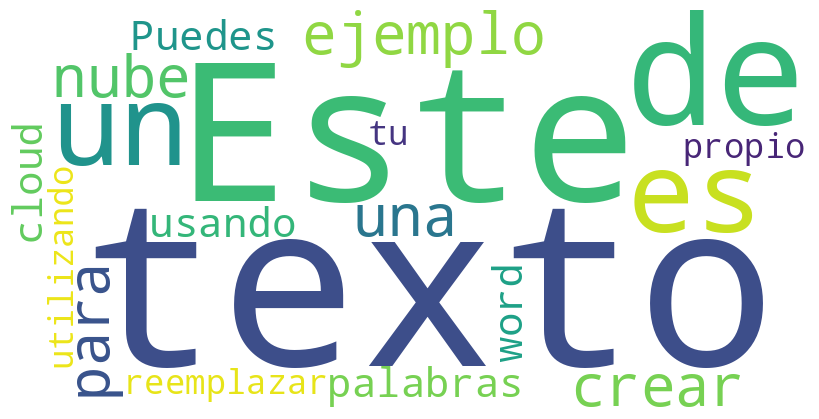

In [187]:

# mostramos la imagen generada
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Modificamos el ejemplo anterior agregando palabras en español que no queremos que considere para crear la nube de palabras. Estas son las stop_words



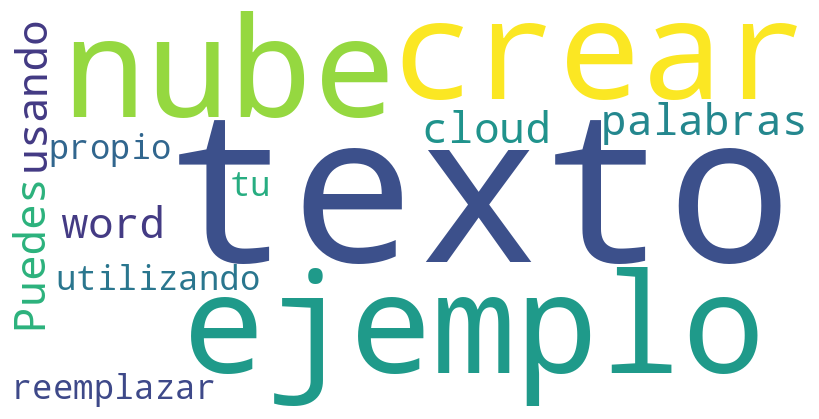

In [188]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Texto de ejemplo
text = "Este es un texto de ejemplo para crear una nube de palabras usando word cloud. Puedes reemplazar este texto utilizando tu propio texto."

# Definir stopwords en español
stopwords_es = set(STOPWORDS)
stopwords_es.update(["con", "que", "los", "para", "un", "una", "el", "la", "en", "y", "o", "de", "a", "se", "es", "al", "como", "por", "no", "su", "más", "pero", "si", "este", "esta", "eso", "esa", "todo", "todos", "todas", "cada", "cual", "cualquier", "algo", "alguna", "algún", "ningún", "ninguna", "ninguno", "otro", "otros", "otras", "sobre", "entre", "durante", "desde", "hasta", "también", "así", "mismo", "misma", "mismo", "misma", "tan", "tanto", "tanta", "muy", "poco", "poca", "poco", "nada", "solo", "sola", "solo", "sola", "siempre", "nunca", "jamás", "casi", "aproximadamente", "cerca", "lejos", "antes", "después", "ahora", "hoy", "ayer", "mañana", "luego", "mientras", "mientras tanto", "después de", "antes de", "durante", "sin", "aunque", "a pesar de", "debido a", "gracias a", "por qué", "cómo", "dónde", "cuándo", "quién", "qué", "cuál"])

# Crear un objeto WordCloud con stopwords en español
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords_es).generate(text)

# Mostramos la imagen generada
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
